In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import spatialdata_io
import spatialdata as sd

# while not pip installable, add path to file 
import sys 
sys.path.append("../..")
import exrna 

In [2]:
xenium_path_cropped='/media/sergio/Discovair_final/mousebrain_prime_crop_points2regions_annotated.zarr'
output_path='/media/sergio/Discovair_final/analysis_crop'
sdata=sd.read_zarr(xenium_path_cropped)

/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)
/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argum

### Compute NMF in extracellular space

In [3]:
sdata=exrna.tl.nmf(sdata, layer='extracellular_transcripts', feature_key='feature_name', bin_key='bin_id', 
    density_table_key='segmentation_free_table', n_components=10, subsample_percentage=0.1,all=False)

In [ ]:
## in this part we plot the factors in exrna
#exrna.pl.nmf_factors_exrna_cells_W(sdata,nmf_adata_key,saving_path=output_path,save=False,spot_size=5) 

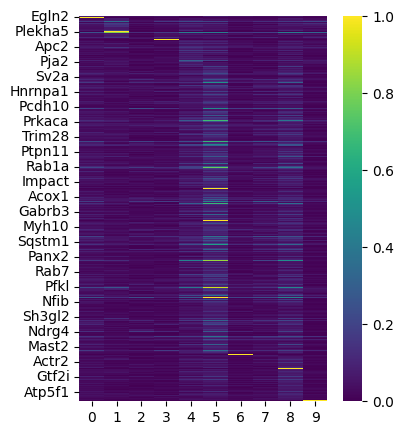

In [5]:
exrna.pl.nmf_gene_contributions(sdata,nmf_adata_key='nmf_data', vmin=0.0, vmax=0.02,saving_path=output_path,save=False,figsize=(4,5))

# Apply nmf to cells

In [ ]:
sdata = exrna.tl.apply_exrna_factors_to_cells(sdata,layer_factors='nmf_data')

/home/sergio/Jnotebooks/exRNA/spatial_exotranscriptomics/notebooks/spatial_data_tutorials/../../exrna/tl/NMF.py:134: ImplicitModificationWarning: Setting element `.obsm['factors']` of view, initializing view as actual.
  adata_annotated_cellular.obsm['factors']=pd.DataFrame(W_annotated,index=adata_annotated_cellular.obs.index)
/home/sergio/anaconda3/envs/spatial_exrna/lib/python3.10/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


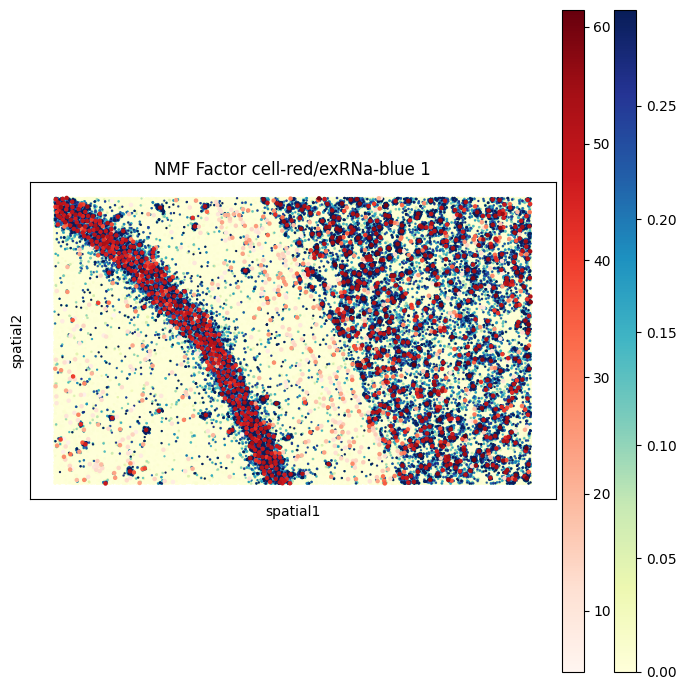

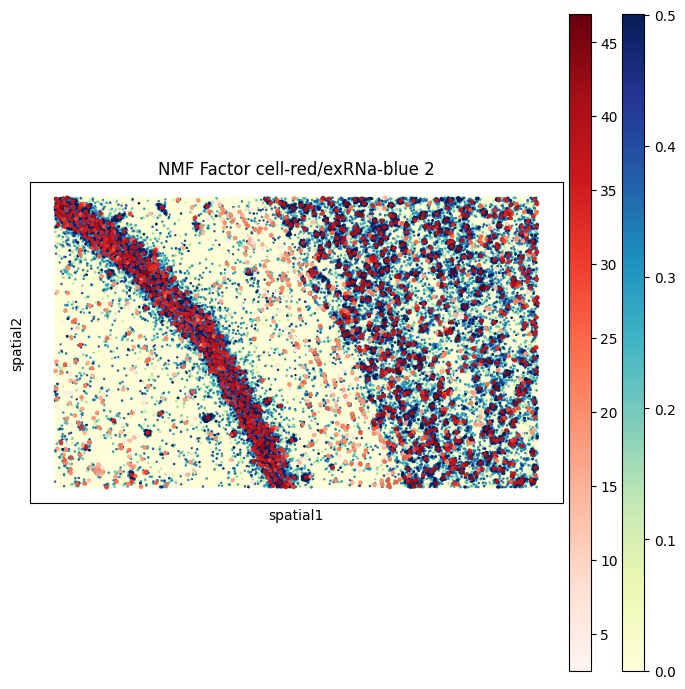

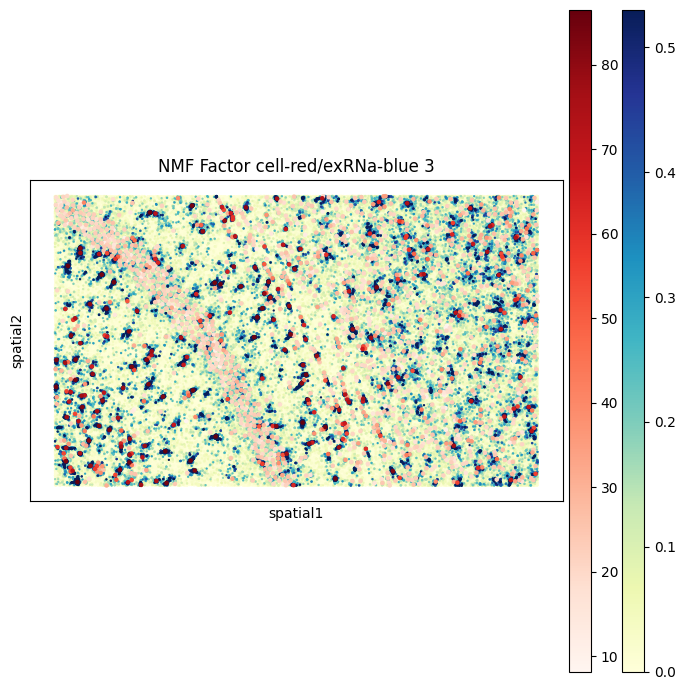

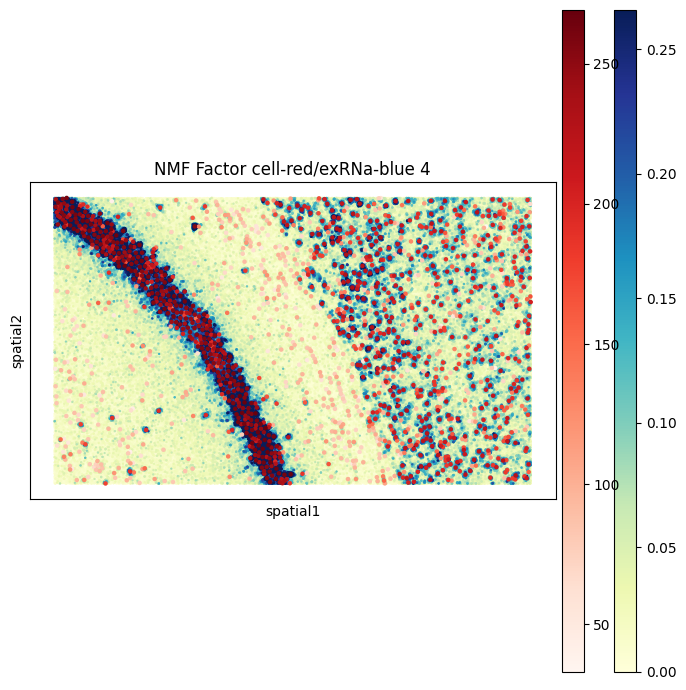

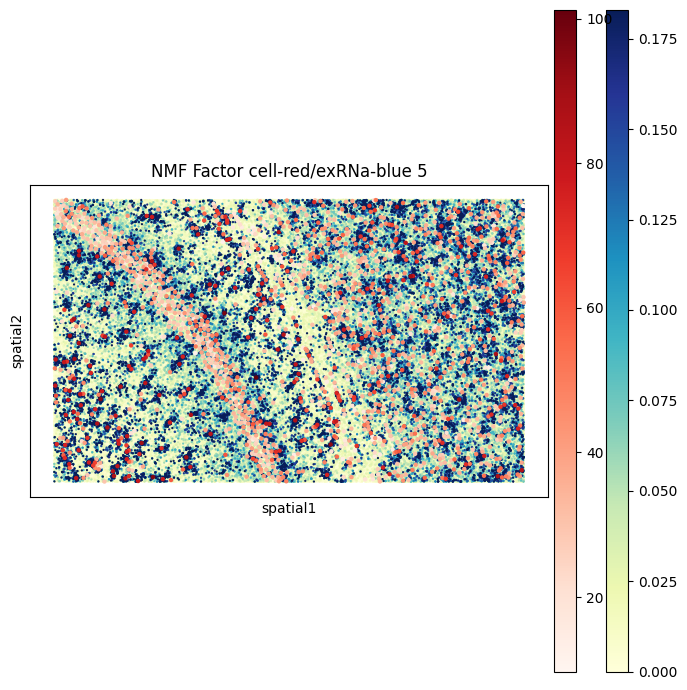

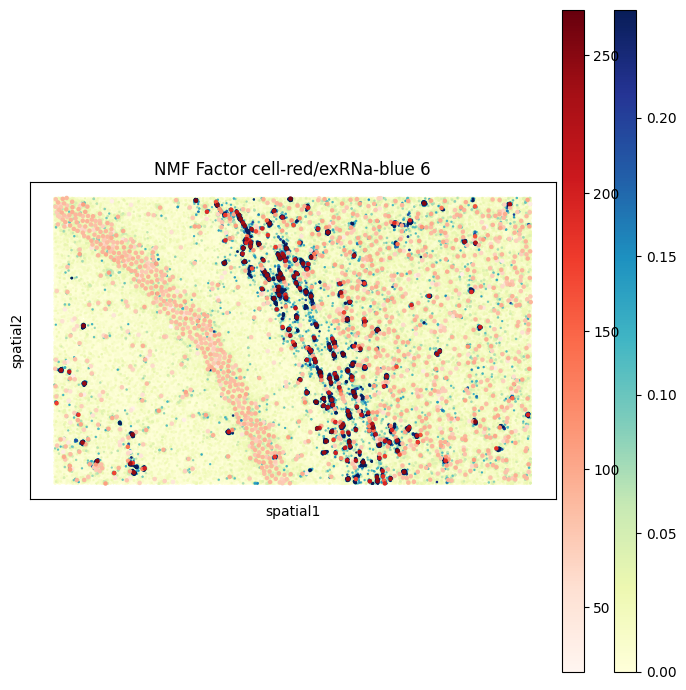

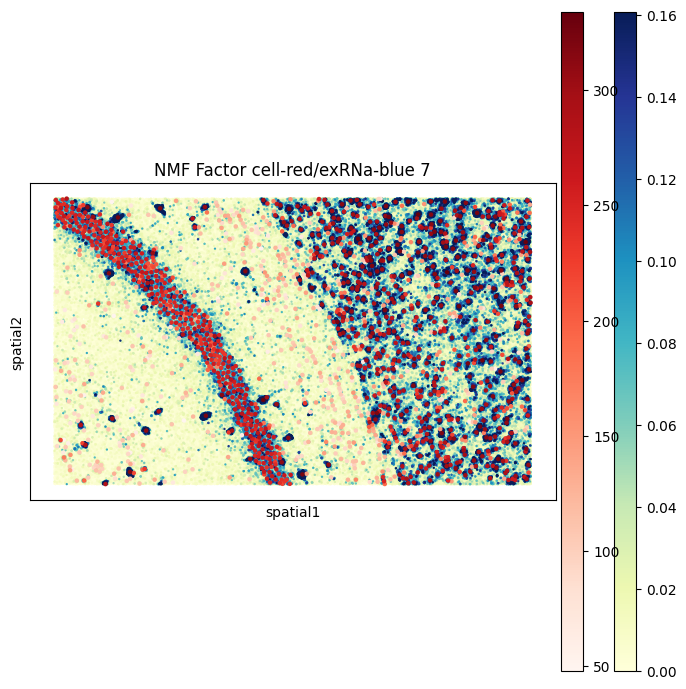

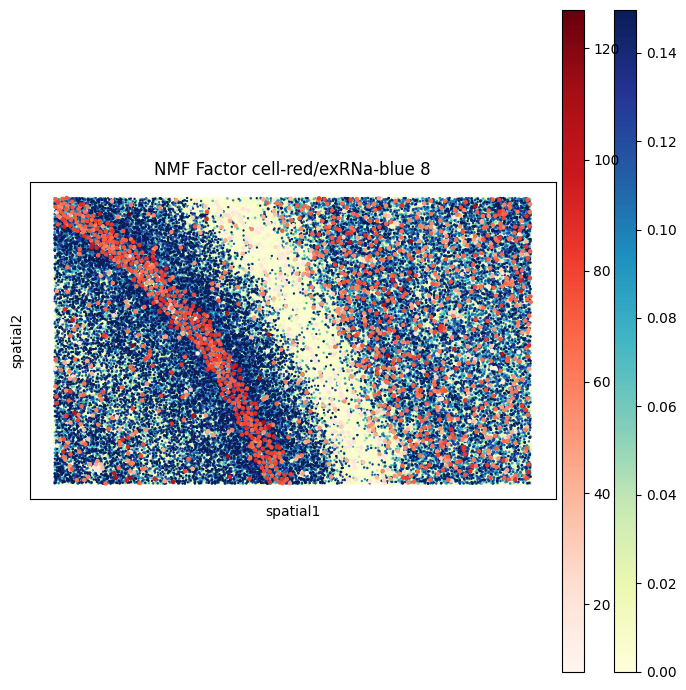

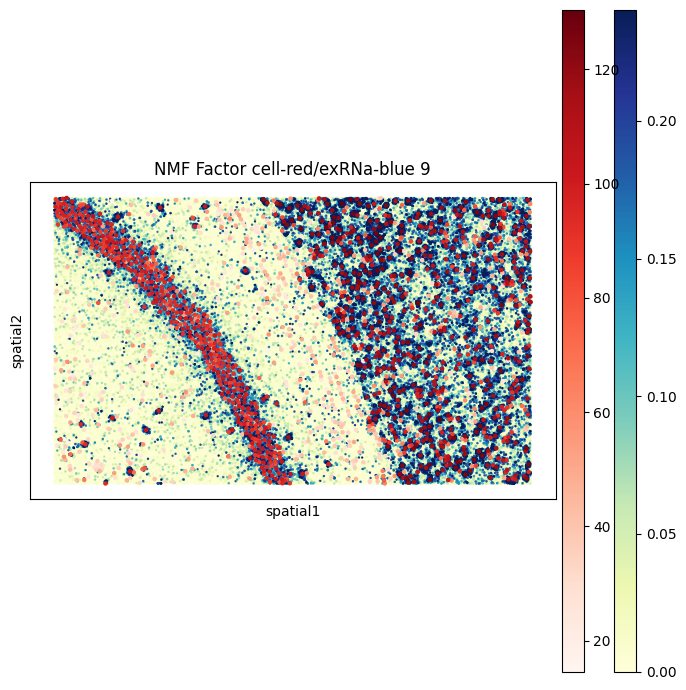

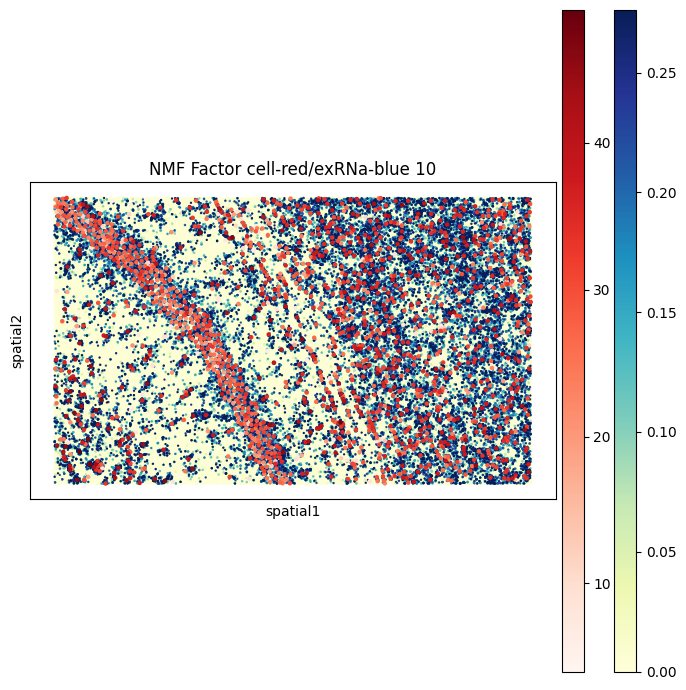

In [ ]:
exrna.pl.paired_nmf_factors(sdata,figsize=(7,7),n_factors=10)